In [220]:
import pandas as pd
import numpy as np

In [222]:
brain_df=pd.read_csv('train.csv')

In [224]:
brain_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


In [226]:
brain_df.shape

(15304, 12)

In [228]:
brain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 15304 non-null  int64  
 1   gender             15304 non-null  object 
 2   age                15304 non-null  float64
 3   hypertension       15304 non-null  int64  
 4   heart_disease      15304 non-null  int64  
 5   ever_married       15304 non-null  object 
 6   work_type          15304 non-null  object 
 7   Residence_type     15304 non-null  object 
 8   avg_glucose_level  15304 non-null  float64
 9   bmi                15304 non-null  float64
 10  smoking_status     15304 non-null  object 
 11  stroke             15304 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 1.4+ MB


In [230]:
brain_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,15304.0,7651.500000,4418.028595,0.00,3825.75,7651.50,11477.25,15303.0
age,15304.0,41.417708,21.444673,0.08,26.00,43.00,57.00,82.0
hypertension,15304.0,0.049726,0.217384,0.00,0.00,0.00,0.00,1.0
heart_disease,15304.0,0.023327,0.150946,0.00,0.00,0.00,0.00,1.0
avg_glucose_level,15304.0,89.039853,25.476102,55.22,74.90,85.12,96.98,267.6
bmi,15304.0,28.112721,6.722315,10.30,23.50,27.60,32.00,80.1
stroke,15304.0,0.041296,0.198981,0.00,0.00,0.00,0.00,1.0


In [232]:
brain_df.describe(include='O')

,gender,ever_married,work_type,Residence_type,smoking_status
count,15304,15304,15304,15304,15304
unique,3,2,5,2,4
top,Female,Yes,Private,Rural,never smoked
freq,9446,10385,9752,7664,6281


In [234]:
brain_df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [236]:
brain_df.nunique()

id                   15304
gender                   3
age                    106
hypertension             2
heart_disease            2
ever_married             2
work_type                5
Residence_type           2
avg_glucose_level     3740
bmi                    407
smoking_status           4
stroke                   2
dtype: int64

In [238]:
brain_df.duplicated().sum()

0

In [240]:
sorted(brain_df['age'].unique().tolist())[0:12]

[0.08, 0.16, 0.24, 0.32, 0.4, 0.48, 0.56, 0.64, 0.68, 0.72, 0.8, 0.88]

In [242]:
brain_df['age']=np.ceil(brain_df['age'])

In [244]:
brain_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15299,15299,Female,22.0,0,0,No,Govt_job,Urban,72.63,19.5,never smoked,0
15300,15300,Female,46.0,1,0,Yes,Private,Urban,101.19,32.1,never smoked,0
15301,15301,Female,75.0,0,0,Yes,Self-employed,Urban,87.69,26.2,never smoked,0
15302,15302,Male,46.0,0,0,Yes,Private,Rural,101.13,22.5,Unknown,0


In [246]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp
sns.set_style('darkgrid')

In [248]:
plot_color=['#008080','black']
sns.set_palette(['#008080','black'])

In [250]:
#filter data for stroke and non stroke
no_stroke=brain_df[brain_df['stroke']==0]
stroke=brain_df[brain_df['stroke']==1]

In [252]:
stroke_counts=brain_df['stroke'].value_counts(normalize=True)

In [254]:
stroke_counts

stroke
0    0.958704
1    0.041296
Name: proportion, dtype: float64

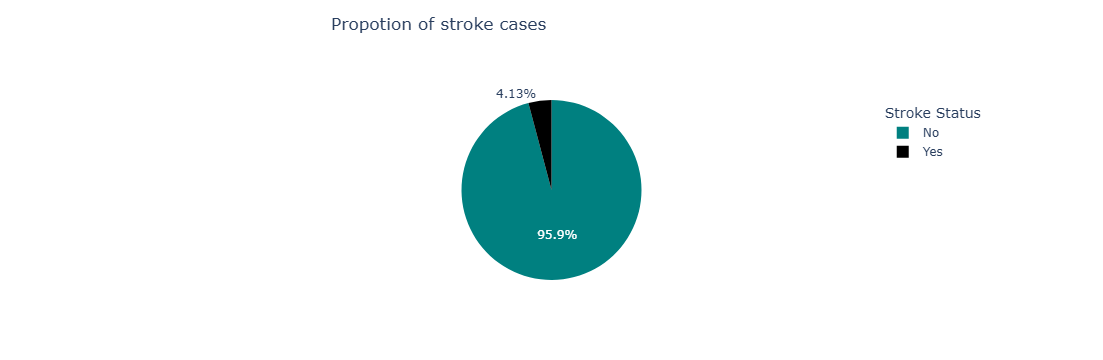

In [256]:
fig=px.pie(stroke_counts,values=stroke_counts.values,names=['No','Yes'],
           title='Propotion of stroke cases',color_discrete_sequence=plot_color)
fig.update_layout(legend_title_text='Stroke Status',title_x=0.3,title_y=0.95)


In [257]:
def custom_histogram(columns:str,titles:list)->go.Figure:
    fig=sp.make_subplots(rows=1,cols=2,subplot_titles=['No Stroke','Yes Stroke'])
    histogram_no_stroke=px.histogram(no_stroke,x=columns,color_discrete_sequence=['#008080'])
    histogram_stroke=px.histogram(stroke,x=columns,color_discrete_sequence=['black'])
    fig.add_trace(histogram_no_stroke['data'][0],row=1,col=1)
    fig.add_trace(histogram_stroke['data'][0],row=1,col=2)
    fig.update_layout(title=titles[0],title_x=0.5)
    fig.update_xaxes(title_text=titles[1])
    fig.update_yaxes(title_text='Count')
    return fig

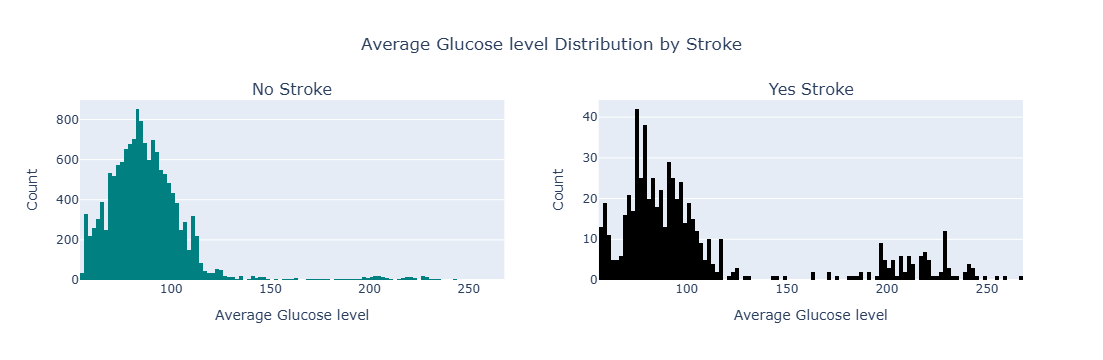

In [260]:
custom_histogram('avg_glucose_level',['Average Glucose level Distribution by Stroke','Average Glucose level'])

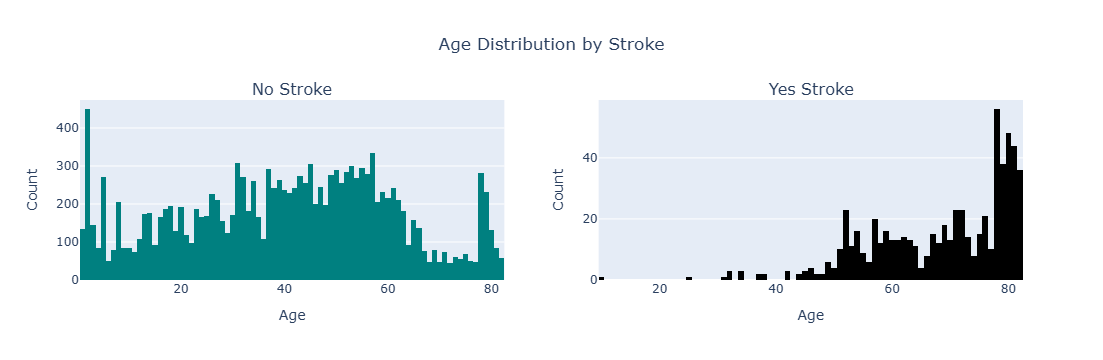

In [261]:
custom_histogram('age',['Age Distribution by Stroke','Age'])

In [263]:
no_stroke['bmi'].mean()

28.02148854961832

In [266]:
stroke['bmi'].mean()

30.230696202531643

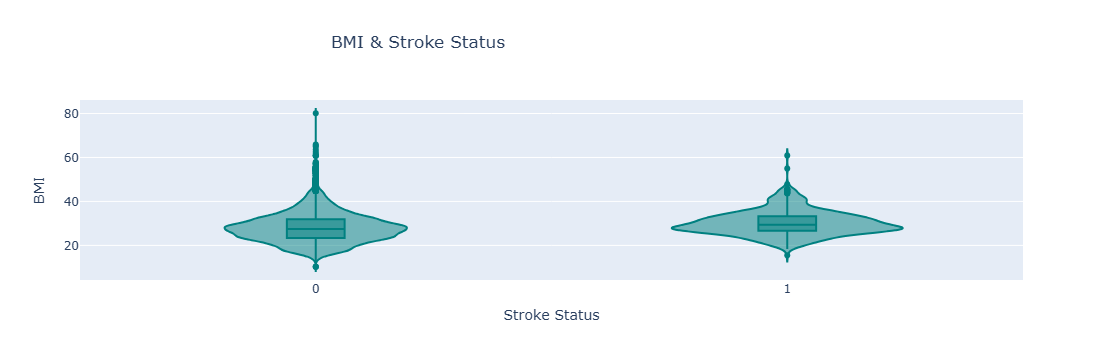

In [268]:
fig=px.violin(brain_df,y='bmi',x='stroke',box=True,color_discrete_sequence=plot_color,
          title='BMI & Stroke Status',labels={'stroke':'Stroke Status','bmi':'BMI'})
fig.update_layout(title_x=0.3,title_y=0.9)

In [270]:
brain_df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

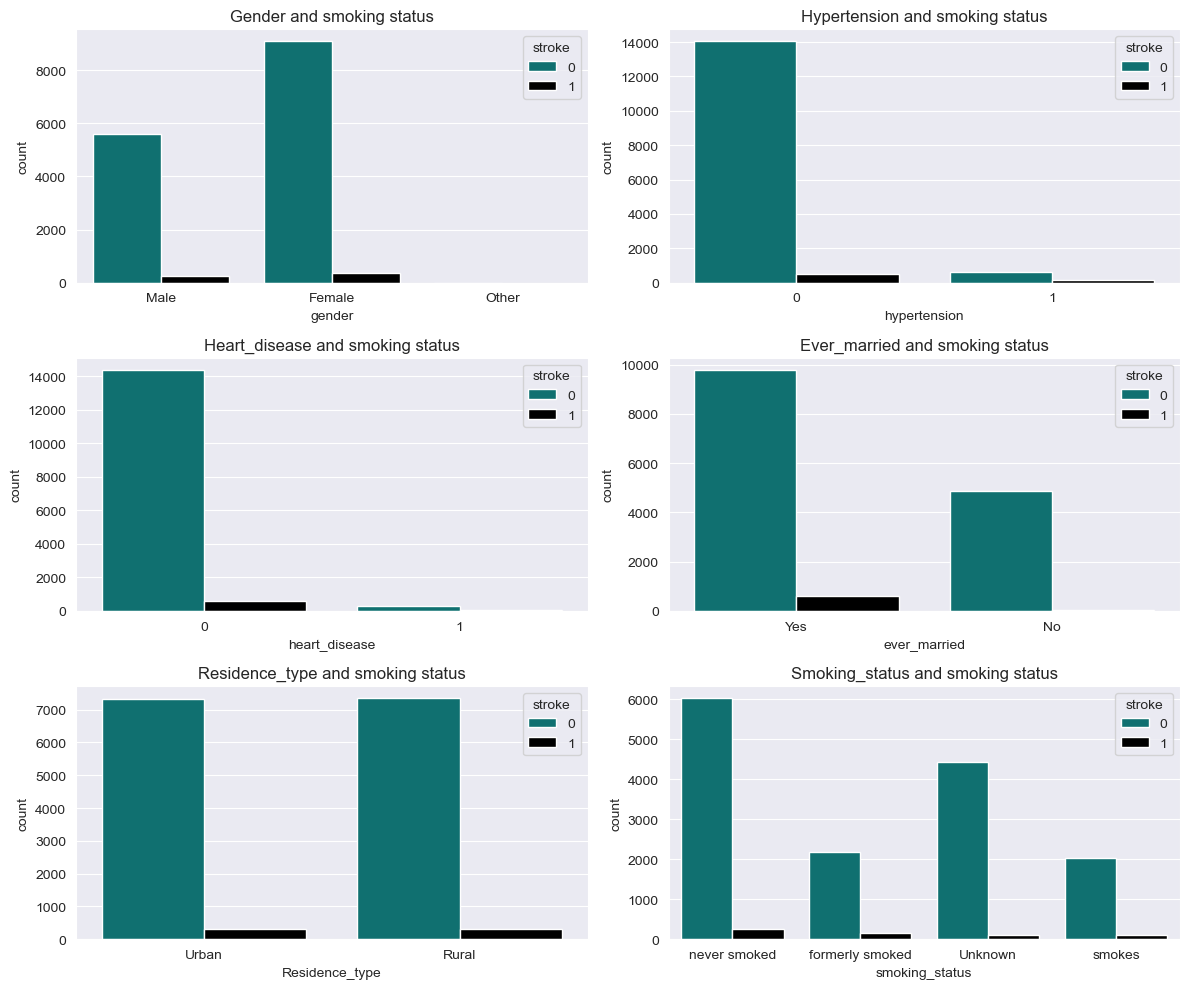

In [271]:
x_values=['gender',  'hypertension', 'heart_disease', 'ever_married','Residence_type', 'smoking_status']
fig,axis=plt.subplots(nrows=3,ncols=2,figsize=(12,10))
for ax,x_value in zip(axis.flat,x_values):                    
    sns.countplot(data=brain_df,x=x_value,hue='stroke',ax=ax)
    ax.set_title(f'{x_value.capitalize()} and smoking status')
plt.tight_layout()
plt.show()

In [273]:
#Data Preprocessing
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn import set_config
set_config(display='diagram')

In [274]:
input_cols=list(brain_df.columns)[1:-1]

In [275]:
target_cols='stroke'

In [276]:
train_input=brain_df[input_cols].copy()
train_target=brain_df[target_cols].copy()
test_input=brain_df[input_cols].copy()

In [277]:
numerical_col=train_input.select_dtypes(include=np.number).columns.to_list()

In [284]:
numerical_col

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

In [286]:
categorical_col=train_input.select_dtypes(include='O').columns.to_list()

In [288]:
categorical_col

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [290]:
categorical_col.remove('smoking_status')

In [292]:
brain_df['smoking_status'].unique()

array(['never smoked', 'formerly smoked', 'Unknown', 'smokes'],
      dtype=object)

In [294]:
ordinal_enc=OrdinalEncoder(categories=[['Unknown','never smoked', 'formerly smoked', 'smokes']])

In [296]:
onehot_enc=OneHotEncoder(handle_unknown='ignore')

In [298]:
preprocessor=ColumnTransformer([
    ('Ordinal_Encode',ordinal_enc,['smoking_status']),
    ('Onehot_Encode',onehot_enc,categorical_col)
])

In [300]:
preprocessor.fit(train_input)

ColumnTransformer(transformers=[('Ordinal_Encode',
                                 OrdinalEncoder(categories=[['Unknown',
                                                             'never smoked',
                                                             'formerly smoked',
                                                             'smokes']]),
                                 ['smoking_status']),
                                ('Onehot_Encode',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['gender', 'ever_married', 'work_type',
                                  'Residence_type'])])

In [302]:
encoded_cols=list(preprocessor.get_feature_names_out())

In [304]:
encoded_cols

['Ordinal_Encode__smoking_status',
 'Onehot_Encode__gender_Female',
 'Onehot_Encode__gender_Male',
 'Onehot_Encode__gender_Other',
 'Onehot_Encode__ever_married_No',
 'Onehot_Encode__ever_married_Yes',
 'Onehot_Encode__work_type_Govt_job',
 'Onehot_Encode__work_type_Never_worked',
 'Onehot_Encode__work_type_Private',
 'Onehot_Encode__work_type_Self-employed',
 'Onehot_Encode__work_type_children',
 'Onehot_Encode__Residence_type_Rural',
 'Onehot_Encode__Residence_type_Urban']

In [306]:
train_input[encoded_cols]=preprocessor.transform(train_input)
test_input[encoded_cols]=preprocessor.transform(test_input)

In [308]:
X_train=train_input[numerical_col+encoded_cols]
y_train=brain_df[target_cols]
X_test=test_input[numerical_col+encoded_cols]

In [310]:
X_train.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,Ordinal_Encode__smoking_status,Onehot_Encode__gender_Female,Onehot_Encode__gender_Male,Onehot_Encode__gender_Other,Onehot_Encode__ever_married_No,Onehot_Encode__ever_married_Yes,Onehot_Encode__work_type_Govt_job,Onehot_Encode__work_type_Never_worked,Onehot_Encode__work_type_Private,Onehot_Encode__work_type_Self-employed,Onehot_Encode__work_type_children,Onehot_Encode__Residence_type_Rural,Onehot_Encode__Residence_type_Urban
0,28.0,0,0,79.53,31.1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,33.0,0,0,78.44,23.9,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,42.0,0,0,103.00,40.3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,56.0,0,0,64.87,28.8,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,24.0,0,0,73.36,28.8,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [312]:
X_train.shape[1]==X_test.shape[1]

True

In [314]:
from sklearn.model_selection import train_test_split

In [316]:
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.2)

In [318]:
X_train

,age,hypertension,heart_disease,avg_glucose_level,bmi,Ordinal_Encode__smoking_status,Onehot_Encode__gender_Female,Onehot_Encode__gender_Male,Onehot_Encode__gender_Other,Onehot_Encode__ever_married_No,Onehot_Encode__ever_married_Yes,Onehot_Encode__work_type_Govt_job,Onehot_Encode__work_type_Never_worked,Onehot_Encode__work_type_Private,Onehot_Encode__work_type_Self-employed,Onehot_Encode__work_type_children,Onehot_Encode__Residence_type_Rural,Onehot_Encode__Residence_type_Urban
10794,61.0,0,0,122.41,36.3,2.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
12792,16.0,0,0,91.30,22.1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3869,39.0,0,0,92.86,24.2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5541,57.0,0,0,73.72,30.1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
10475,76.0,1,0,91.61,30.7,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11159,79.0,0,0,91.05,26.1,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2076,66.0,0,0,85.52,30.9,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9248,26.0,0,0,85.12,20.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
8992,57.0,0,0,88.85,32.8,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [320]:
y_train

10794    0
12792    0
3869     0
5541     0
10475    0
        ..
11159    1
2076     0
9248     0
8992     0
5678     0
Name: stroke, Length: 12243, dtype: int64

In [429]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

In [431]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [433]:
models=[
    (LogisticRegression(max_iter=1000),'LogisticRegression'),
    (DecisionTreeClassifier(),'DecisionTreeClassifier'),
    (RandomForestClassifier(),'RandomForestClassifier'),
    (LGBMClassifier(verbose=1),'LightGBM'),
    (XGBClassifier(),'XGBClassifier')
]

In [435]:
def eval_model(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    confusion_mat = confusion_matrix(y_val, y_pred)
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    return confusion_mat, accuracy, precision, recall, f1

In [437]:
def metric_df(model, model_name, X_train, y_train, X_val, y_val):
    confusion_mat, accuracy, precision, recall, f1 = eval_model(model, X_train, y_train, X_val, y_val)
    confusion_mats[model_name] = confusion_mat
    model_metrics = pd.DataFrame(data=[[accuracy, precision, recall, f1]], columns=['Accuracy', 'Precision', 'Recall', 'F1'])
    model_metrics.insert(0, 'Model', model_name)    
    return model_metrics

In [439]:
predictions = []
for model, model_name in models:
    model_metrics = metric_df(model, model_name, X_train, y_train, X_val, y_val)
    predictions.append(model_metrics)
all_model_metrics = pd.concat(predictions, ignore_index=True)
print(all_model_metrics)

[LightGBM] [Info] Number of positive: 494, number of negative: 11749
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003231 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 623
[LightGBM] [Info] Number of data points in the train set: 12243, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.040350 -> initscore=-3.168988
[LightGBM] [Info] Start training from score -3.168988
                    Model  Accuracy  Precision    Recall        F1
0      LogisticRegression  0.955243   0.666667  0.014493  0.028369
1                LightGBM  0.951650   0.291667  0.050725  0.086420
2           XGBClassifier  0.952630   0.387097  0.086957  0.142012
3  DecisionTreeClassifier  0.929108   0.215827  0.217391  0.216606
4  RandomForestClassifier  0.955570   0.555556  0.072464  0.128205


In [441]:
oversample=SMOTE()
X_train_ns,y_train_ns=oversample.fit_resample(X_train,y_train)

In [443]:
X_train_ns.shape

(23498, 18)

In [447]:
lr_with_smote=LogisticRegression()
lr_with_smote.fit(X_train_ns,y_train_ns)
lr_with_smote_mat=metric_df(lr_with_smote,'Logistic with SMOTE' ,X_train_ns, y_train_ns, X_val, y_val)
predictions.append(lr_with_smote_mat)

C:\Users\JESMA\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\JESMA\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [449]:
for model_name,confusion_mat in confusion_mats.items():
    print(f'confusion matrix for{model_name}')
    print(confusion_mat)
    print()

confusion matrix forLogisticRegression
[[2922    1]
 [ 136    2]]

confusion matrix forDecisionTreeClassifier
[[2814  109]
 [ 108   30]]

confusion matrix forRandomForestClassifier
[[2915    8]
 [ 128   10]]

confusion matrix forLightGBM
[[2906   17]
 [ 131    7]]

confusion matrix forXGBClassifier
[[2904   19]
 [ 126   12]]

confusion matrix forLogistic with SMOTE
[[2314  609]
 [  35  103]]



In [451]:
from sklearn.ensemble import  VotingClassifier

In [453]:
estimator=[]
estimator.append(('LogisticRegression',LogisticRegression())),
estimator.append(('DecisionTreeClassifier',DecisionTreeClassifier())),
estimator.append(('RandomForestClassifier',RandomForestClassifier())),
estimator.append(('LightGBM',LGBMClassifier())),
estimator.append(('XGBClassifier',XGBClassifier()))

In [459]:
vc_hard=VotingClassifier(estimators=estimator,voting='hard')
vc_hard.fit(X_train,y_train)
vc_hard_mat=metric_df(vc_hard,'VC_HARD',X_train, y_train, X_val, y_val)
predictions.append(vc_hard_mat)

C:\Users\JESMA\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[LightGBM] [Info] Number of positive: 494, number of negative: 11749
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000825 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 623
[LightGBM] [Info] Number of data points in the train set: 12243, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.040350 -> initscore=-3.168988
[LightGBM] [Info] Start training from score -3.168988


C:\Users\JESMA\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[LightGBM] [Info] Number of positive: 494, number of negative: 11749
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001482 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 623
[LightGBM] [Info] Number of data points in the train set: 12243, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.040350 -> initscore=-3.168988
[LightGBM] [Info] Start training from score -3.168988


In [461]:
vc_hard_mat

,Model,Accuracy,Precision,Recall,F1
0,VC_HARD,0.953937,0.411765,0.050725,0.090323


In [463]:
vc_soft=VotingClassifier(estimators=estimator,voting='soft')
vc_soft.fit(X_train,y_train)
vc_soft_mat=metric_df(vc_soft,'VC_soft',X_train, y_train, X_val, y_val)
predictions.append(vc_soft_mat)

C:\Users\JESMA\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[LightGBM] [Info] Number of positive: 494, number of negative: 11749
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000882 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 623
[LightGBM] [Info] Number of data points in the train set: 12243, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.040350 -> initscore=-3.168988
[LightGBM] [Info] Start training from score -3.168988


C:\Users\JESMA\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[LightGBM] [Info] Number of positive: 494, number of negative: 11749
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000844 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 623
[LightGBM] [Info] Number of data points in the train set: 12243, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.040350 -> initscore=-3.168988
[LightGBM] [Info] Start training from score -3.168988


In [465]:
vc_soft_mat

,Model,Accuracy,Precision,Recall,F1
0,VC_soft,0.95459,0.478261,0.07971,0.136646


In [467]:
prediction_base=pd.concat(predictions,ignore_index=True,sort=False)
prediction_base.sort_values(by=['Recall'],ascending=False).style.hide(axis='index')

Model,Accuracy,Precision,Recall,F1
Logistic with SMOTE,0.789611,0.144663,0.746377,0.242353
DecisionTreeClassifier,0.929108,0.215827,0.217391,0.216606
XGBClassifier,0.952630,0.387097,0.086957,0.142012
VC_soft,0.954590,0.478261,0.079710,0.136646
RandomForestClassifier,0.955570,0.555556,0.072464,0.128205
LightGBM,0.951650,0.291667,0.050725,0.086420
VC_HARD,0.953937,0.411765,0.050725,0.090323
LogisticRegression,0.955243,0.666667,0.014493,0.028369


In [471]:
models_to_plot=['LogisticRegression','RandomForestClassifier','DecisionTreeClassifier','XGBClassifier','Logistic with SMOTE','LightGBM']


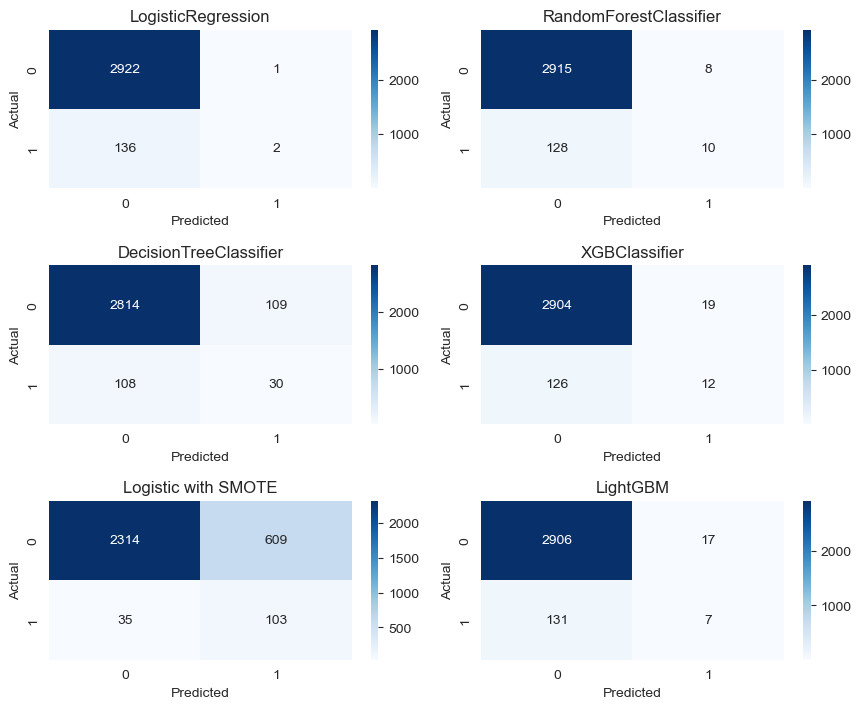

In [477]:
fig, axes = plt.subplots(nrows = 3, ncols =2, figsize = (9, 7))
for ax, model_name in zip(axes.ravel(), models_to_plot):
    confusion_mat = confusion_mats[model_name]
    sns.heatmap(confusion_mat, annot=True, fmt='d', cmap = 'Blues', ax = ax)
    ax.set_title(f'{model_name}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.subplots_adjust(left=0, right = 0.9, top =0.9, bottom = 0)
plt.show()

In [479]:
X_train=train_input[numerical_col+encoded_cols]
y_train=brain_df[target_cols]

In [481]:
pred=lr_with_smote.predict(X_test)

In [483]:
pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [485]:
sub_df=pred

In [491]:
pd.DataFrame(sub_df).to_csv('brain_stroke.csv',index=None)

In [493]:
sub_df=pd.read_csv('brain_stroke.csv')

In [495]:
sub_df

,0
0,0
1,0
2,0
3,0
4,0
...,...
15299,0
15300,0
15301,1
15302,0


In [497]:
sub_df['stroke']=pred

In [499]:
sub_df

,0,stroke
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
15299,0,0
15300,0,0
15301,1,1
15302,0,0


In [509]:
input = {    'gender': 'Male',  'age': 33,'hypertension':0,'heart_disease': 0, 
    'ever_married':'Yes','work_type':'Private','Residence_type':'Urban','avg_glucose_level':79.53,
    'bmi': 31.10,'smoking_status': 'formerly smoked'
}

In [511]:
input_df=pd.DataFrame([input])

In [513]:
input_df[encoded_cols]=preprocessor.transform(input_df)

In [515]:
X=input_df[numerical_col+encoded_cols]

In [517]:
lr_with_smote.predict(X)

array([0], dtype=int64)

In [519]:
import joblib

In [523]:
model = {
    'encoded_cols': encoded_cols, 
    'numeric_cols':numerical_col, 
    'preprocessor': preprocessor, 
    'model': lr_with_smote
}

In [525]:
joblib.dump(model,'model.joblib')

['model.joblib']